In [1]:
library("rjson")
library("dplyr")
library(ggplot2)
library(ggsoccer)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




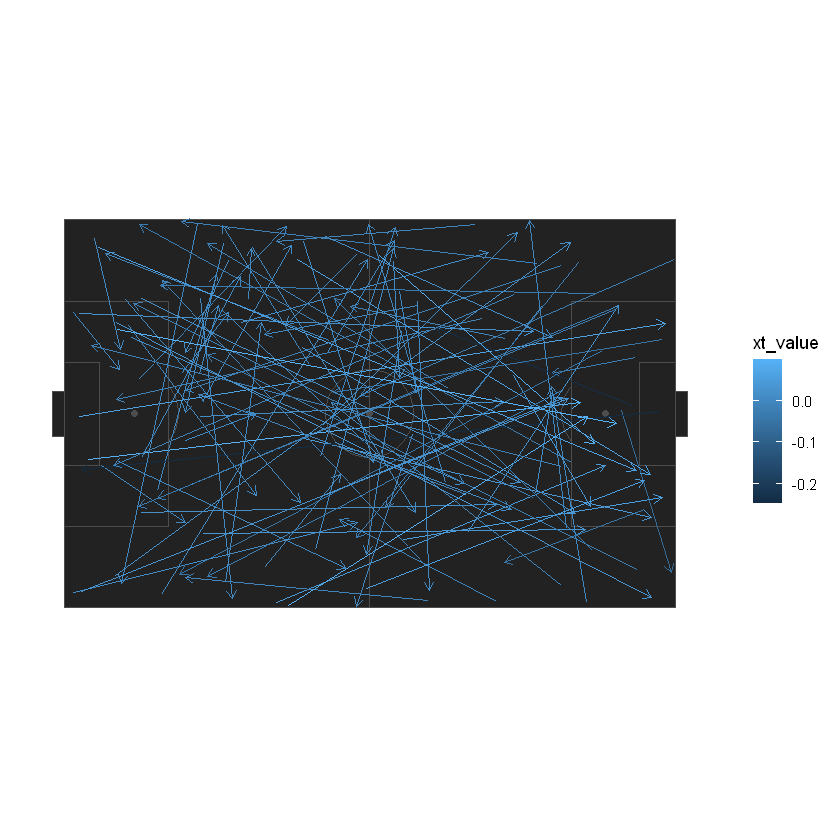

In [2]:
data <- fromJSON(file = "C:\\code_repository\\python_files\\ExpectedPossessionValue\\expected_threat.json")
data <- t(array(unlist(data), dim = c(12, 8))) ###this is where the error was, the xt data was being read in the wrong dimensions
set.seed(888)
df <- data.frame(matrix(runif(400), ncol=4))*100
colnames(df) <- c("x1", "y1", "x2", "y2")

get_bin <- function(val, binl, max_val){
  ifelse(val == max_val, as.integer(val/binl), as.integer(val/binl)+1)
}

df$x1_bin = mapply(get_bin, df$x1, 100/12, 100)  
df$y1_bin = mapply(get_bin, df$y1, 12.5, 100)  
df$x2_bin = mapply(get_bin, df$x2, 100/12, 100)  
df$y2_bin = mapply(get_bin, df$y2, 12.5, 100)  

df <- cbind(df, start_val = mapply(function(x,y) data[y,x], df$x1_bin, df$y1_bin))
df <- cbind(df, end_val = mapply(function(x,y) data[y,x], df$x2_bin, df$y2_bin))

df$xt_value <- (df$end_val - df$start_val)

###plot all passes to check
ggplot(df) + 
    annotate_pitch(colour="grey30", fill="#222222") +
    theme_pitch() +
    geom_segment(aes(x=x1, y=y1, xend=x2, yend=y2, colour=xt_value),arrow= arrow(length=unit(0.08, 'inches')))

### Top 10 most valuable fake passes

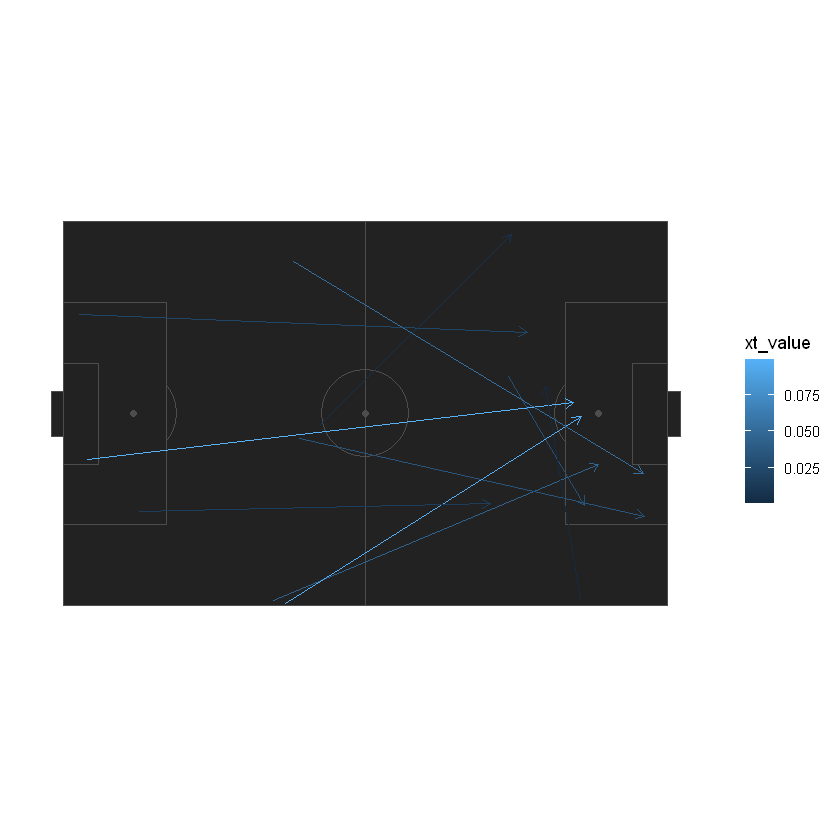

In [3]:
sdf <- head(df %>% filter(x2>70 & xt_value>0), 10)
ggplot(sdf) + 
    annotate_pitch(colour="grey30", fill="#222222") +
    theme_pitch() +
    geom_segment(aes(x=x1, y=y1, xend=x2, yend=y2, colour=xt_value),arrow= arrow(length=unit(0.08, 'inches'))) 